In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv("C:/Users/Dell/Downloads/exams/data.csv")

In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [24]:
data.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
data.drop(["race/ethnicity","lunch","test preparation course"],axis=1,inplace=True)

In [26]:
data.head()

,gender,parental level of education,math score,reading score,writing score
0,female,bachelor's degree,72,72,74
1,female,some college,69,90,88
2,female,master's degree,90,95,93
3,male,associate's degree,47,57,44
4,male,some college,76,78,75


In [27]:
data.isnull().sum()

gender                         0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [28]:
data.rename(columns={"parental level of education":"education"},inplace=True)

In [29]:
data.head()

,gender,education,math score,reading score,writing score
0,female,bachelor's degree,72,72,74
1,female,some college,69,90,88
2,female,master's degree,90,95,93
3,male,associate's degree,47,57,44
4,male,some college,76,78,75


In [30]:
data["Total"]=data["math score"]+data["reading score"]+data["writing score"]

In [31]:
data.head()

,gender,education,math score,reading score,writing score,Total
0,female,bachelor's degree,72,72,74,218
1,female,some college,69,90,88,247
2,female,master's degree,90,95,93,278
3,male,associate's degree,47,57,44,148
4,male,some college,76,78,75,229


In [32]:
data["Percentage"]=data["Total"]/300*100

In [33]:
data.head()

,gender,education,math score,reading score,writing score,Total,Percentage
0,female,bachelor's degree,72,72,74,218,72.666667
1,female,some college,69,90,88,247,82.333333
2,female,master's degree,90,95,93,278,92.666667
3,male,associate's degree,47,57,44,148,49.333333
4,male,some college,76,78,75,229,76.333333


In [34]:
data.education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: education, dtype: int64

In [35]:
#data["Pass"]=data.Percentage>40

In [36]:


data.loc[data["Percentage"]>=90,"Grade"]="A+"
data.loc[(data.Percentage>=80) & (data.Percentage<90),"Grade"]="A"
data.loc[(data.Percentage>=70) & (data.Percentage<80),"Grade"]="B+"
data.loc[(data.Percentage>=60) & (data.Percentage<70),"Grade"]="B"
data.loc[(data.Percentage>=50) & (data.Percentage<60),"Grade"]="C"
data.loc[(data.Percentage>=40) & (data.Percentage<50),"Grade"]="D"
data.loc[data.Percentage<40,"Grade"]="F"




In [37]:
data.head()

,gender,education,math score,reading score,writing score,Total,Percentage,Grade
0,female,bachelor's degree,72,72,74,218,72.666667,B+
1,female,some college,69,90,88,247,82.333333,A
2,female,master's degree,90,95,93,278,92.666667,A+
3,male,associate's degree,47,57,44,148,49.333333,D
4,male,some college,76,78,75,229,76.333333,B+


In [38]:
conditions=[(data["Percentage"]>=90),(data["Percentage"]>=80) & (data["Percentage"]<90),(data["Percentage"]>=70) & (data["Percentage"]<80),(data["Percentage"]>=60) & (data["Percentage"]<70),(data["Percentage"]>=50) & (data["Percentage"]<60),(data["Percentage"]>=40) & (data["Percentage"]<50),(data["Percentage"]<40),]
Values=["A+","A","B+","B","C","D","F"]
data["Grade"]=np.select(conditions,Values)
data.head()

,gender,education,math score,reading score,writing score,Total,Percentage,Grade
0,female,bachelor's degree,72,72,74,218,72.666667,B+
1,female,some college,69,90,88,247,82.333333,A
2,female,master's degree,90,95,93,278,92.666667,A+
3,male,associate's degree,47,57,44,148,49.333333,D
4,male,some college,76,78,75,229,76.333333,B+


In [39]:
data.loc[data["Percentage"]>40,"Result"]="Pass"
data.loc[data["Percentage"]<40,"Result"]="Fail"


In [40]:
data.head()

,gender,education,math score,reading score,writing score,Total,Percentage,Grade,Result
0,female,bachelor's degree,72,72,74,218,72.666667,B+,Pass
1,female,some college,69,90,88,247,82.333333,A,Pass
2,female,master's degree,90,95,93,278,92.666667,A+,Pass
3,male,associate's degree,47,57,44,148,49.333333,D,Pass
4,male,some college,76,78,75,229,76.333333,B+,Pass


In [41]:
data["Result"].value_counts()

Pass    968
Fail     30
Name: Result, dtype: int64

In [42]:
data.education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [43]:
high_school=(data["education"]=="high school")
df_high_school=data[high_school]
df_high_school.head()

,gender,education,math score,reading score,writing score,Total,Percentage,Grade,Result
8,male,high school,64,64,67,195,65.000000,B,Pass
9,female,high school,38,60,50,148,49.333333,D,Pass
12,female,high school,65,81,73,219,73.000000,B+,Pass
16,male,high school,88,89,86,263,87.666667,A,Pass
20,male,high school,66,69,63,198,66.000000,B,Pass


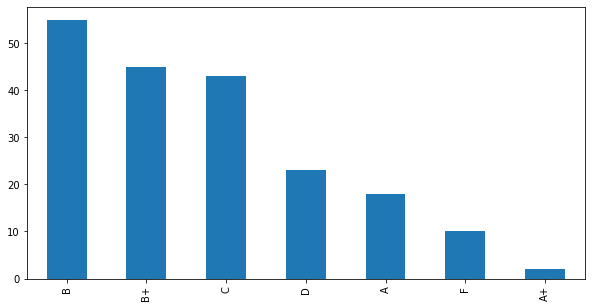

In [44]:
Grade_count=df_high_school.Grade.value_counts()
Grade_count.plot(kind="bar",figsize=(10,5))
plt.show()


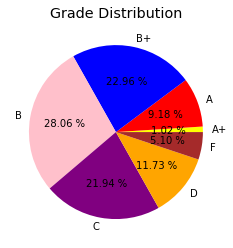

In [58]:
grade1=df_high_school.loc[df_high_school["Grade"]=="A+"].count()[0]
grade2=df_high_school.loc[df_high_school["Grade"]=="A"].count()[0]
grade3=df_high_school.loc[df_high_school["Grade"]=="B+"].count()[0]
grade4=df_high_school.loc[df_high_school["Grade"]=="B"].count()[0]
grade5=df_high_school.loc[df_high_school["Grade"]=="C"].count()[0]
grade6=df_high_school.loc[df_high_school["Grade"]=="D"].count()[0]
grade7=df_high_school.loc[df_high_school["Grade"]=="F"].count()[0]
labels=["A+","A","B+","B","C","D","F"]
colors=["yellow","red","blue","pink","purple","orange","brown"]
plt.pie([grade1,grade2,grade3,grade4,grade5,grade6,grade7],labels=labels,colors=colors,autopct="%.2f %%")
plt.title("Grade Distribution")
plt.show()

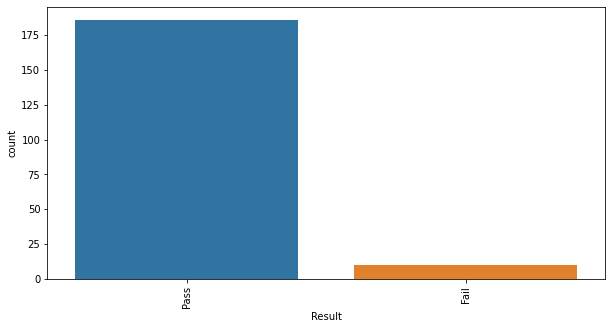

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x="Result",data=df_high_school)
plt.xticks(rotation=90)
plt.show()

In [67]:
df_high_school.groupby(["gender","Result"]).groups

{('female', 'Fail'): [55, 217, 601, 842, 980], ('female', 'Pass'): [9, 12, 47, 125, 156, 168, 176, 182, 212, 220, 242, 247, 248, 263, 267, 277, 309, 320, 321, 324, 341, 342, 345, 360, 388, 396, 403, 404, 408, 421, 431, 441, 468, 471, 494, 519, 527, 537, 548, 573, 574, 577, 586, 593, 598, 615, 620, 633, 636, 643, 647, 648, 651, 663, 670, 674, 680, 718, 728, 742, 760, 763, 765, 766, 776, 782, 790, 794, 807, 814, 818, 823, 833, 835, 837, 840, 848, 851, 882, 902, 917, 921, 927, 937, 944, 949, 958, 972, 997], ('male', 'Fail'): [84, 91, 596, 706, 896], ('male', 'Pass'): [8, 16, 20, 28, 49, 53, 81, 92, 103, 111, 115, 123, 137, 143, 163, 166, 170, 186, 197, 207, 214, 218, 227, 240, 249, 254, 264, 280, 281, 294, 298, 315, 330, 340, 348, 366, 395, 415, 419, 432, 438, 447, 448, 459, 467, 480, 483, 485, 495, 506, 524, 534, 540, 547, 568, 603, 622, 631, 635, 640, 644, 681, 682, 688, 699, 708, 723, 739, 746, 767, 770, 792, 796, 808, 811, 825, 836, 847, 858, 866, 870, 887, 889, 906, 920, 922, 924, 94

In [46]:
df_high_school.describe()

,math score,reading score,writing score,Total,Percentage
count,196.000000,196.000000,196.000000,196.000000,196.000000
mean,62.137755,64.704082,62.448980,189.290816,63.096939
std,14.539651,14.132130,14.085907,40.531749,13.510583
min,8.000000,24.000000,15.000000,55.000000,18.333333
25%,53.750000,54.000000,52.000000,161.750000,53.916667
50%,63.000000,66.000000,64.000000,195.000000,65.000000
75%,72.000000,74.250000,73.000000,218.000000,72.666667
max,99.000000,99.000000,100.000000,287.000000,95.666667


In [69]:
df_high_school.rename(columns={"math score":"Maths","reading score":"Reading","writing score":"Writing"},inplace=True)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [70]:
df_high_school.head()

,gender,education,Maths,Reading,Writing,Total,Percentage,Grade,Result
8,male,high school,64,64,67,195,65.000000,B,Pass
9,female,high school,38,60,50,148,49.333333,D,Pass
12,female,high school,65,81,73,219,73.000000,B+,Pass
16,male,high school,88,89,86,263,87.666667,A,Pass
20,male,high school,66,69,63,198,66.000000,B,Pass


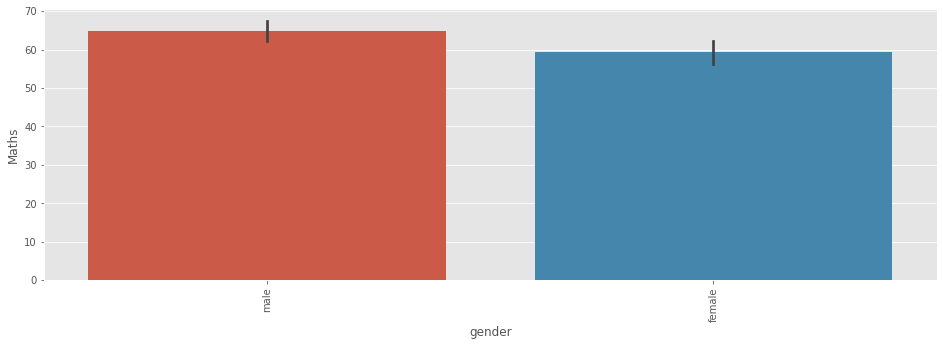

In [72]:

plt.figure(figsize=(16,5))
sns.barplot(x="gender",y="Maths",data=df_high_school)
plt.xticks(rotation=90)
plt.show()

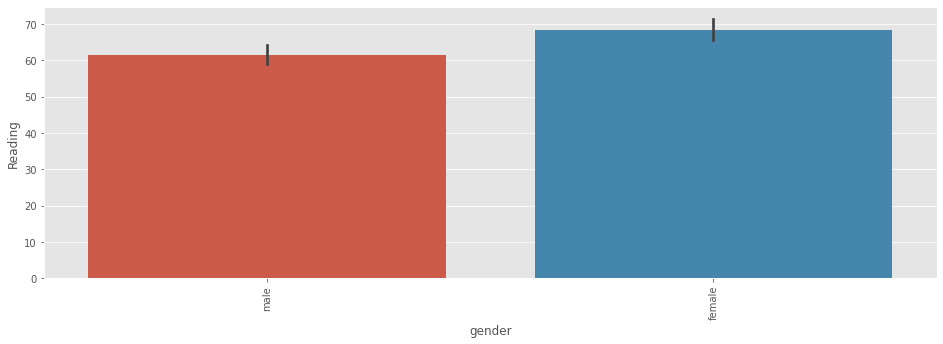

In [73]:
plt.figure(figsize=(16,5))
sns.barplot(x="gender",y="Reading",data=df_high_school)
plt.xticks(rotation=90)
plt.show()

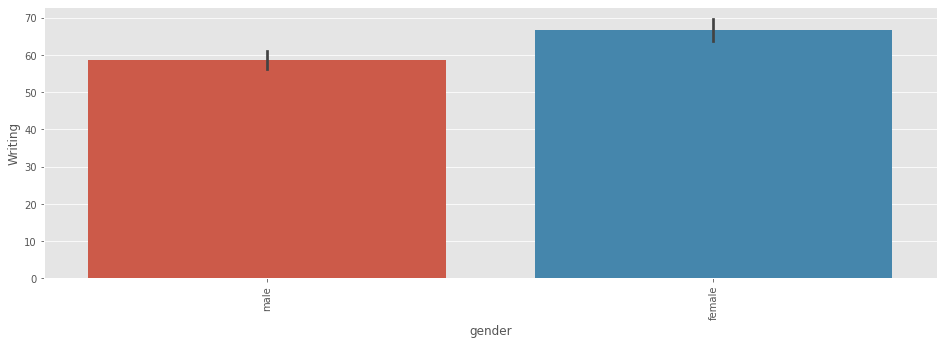

In [74]:
plt.figure(figsize=(16,5))
sns.barplot(x="gender",y="Writing",data=df_high_school)
plt.xticks(rotation=90)
plt.show()

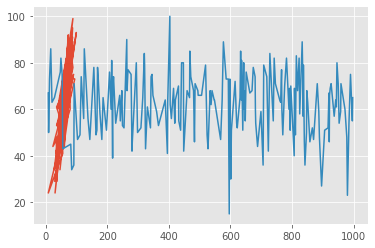

In [77]:
plt.plot(df_high_school.Maths,df_high_school.Reading,df_high_school.Writing)
plt.show()

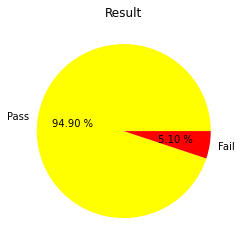

In [50]:
Pass=df_high_school.loc[df_high_school["Result"]=="Pass"].count()[0]
Fail=df_high_school.loc[df_high_school["Result"]=="Fail"].count()[0]
labels=["Pass","Fail"]
colors=["yellow","red"]
plt.pie([Pass,Fail],labels=labels,colors=colors,autopct="%.2f %%")
plt.title("Result")
plt.show()


In [54]:
Male_result=df_high_school.Result[df_high_school.gender=="male"].value_counts()
Male_result

Pass    97
Fail     5
Name: Result, dtype: int64

In [55]:
Female_result=df_high_school.Result[df_high_school.gender=="female"].value_counts()
Female_result

Pass    89
Fail     5
Name: Result, dtype: int64

In [56]:
Gender_result=pd.crosstab(df_high_school.Result,df_high_school.gender)
Gender_result


gender,female,male
Result,,
Fail,5,5
Pass,89,97


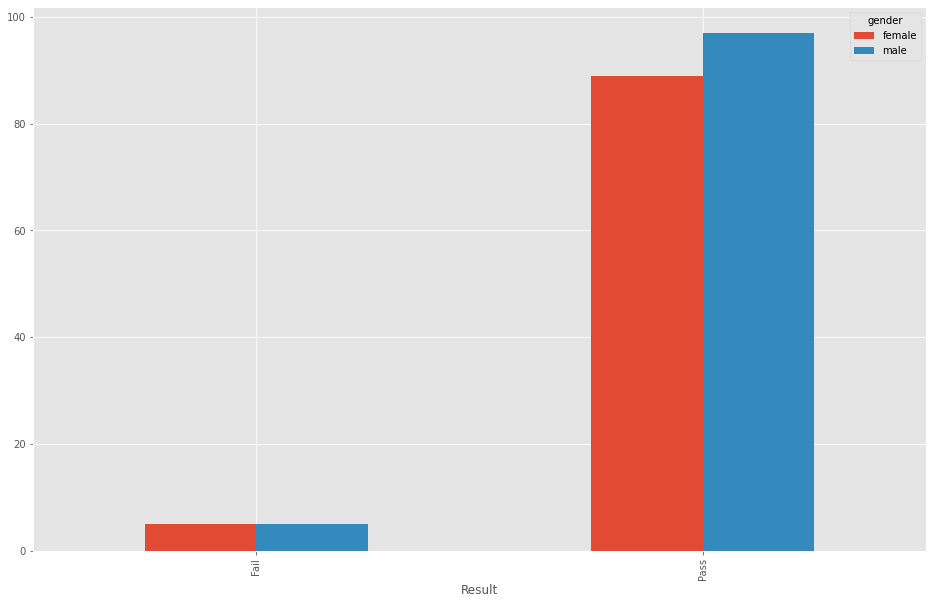

In [57]:
Gender_result.plot(kind="bar",figsize=(16,10))
plt.show()